In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time
import math
import random
import warnings 
from scipy.spatial.distance import cdist
random.seed(10)



df = pd.read_csv("/content/drive/MyDrive/Machine learning/Assignment/Assignment 5/IRIS.csv")


#Top values of Dataset
print(df.head())
# here we can see that we can use four features to classify the spicies.

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [273]:
print(df.info())
print(df.isnull().sum())
# from here we can see that we have no missing values for all four features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


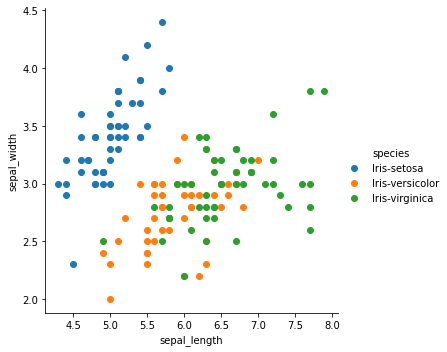

In [274]:
# spliting target into another dataframe.
X=pd.DataFrame(df,columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
y=pd.DataFrame(df,columns=['Classes'])

# clustering_data = data.iloc[:,[0,1,2,3]]
#target_data = data.iloc[:,4]
x = pd.DataFrame(df[['sepal_length','sepal_width','petal_length','petal_width']],columns =['sepal_length','sepal_width','petal_length','petal_width'])
print(df['species'].value_counts())
# initially our data look like this.
sns.FacetGrid(df, hue="species",height =5).map(plt.scatter, "sepal_length", "sepal_width").add_legend()

<ipython-input-275-d42f957c5638>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1, 8), css, 'bx-', color='red')


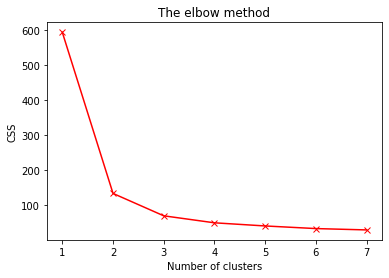

In [275]:
'''
def euclidean(point, data):

    #Euclidean distance between point & data.
    #Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    
    return np.sqrt(np.sum((point - data)**2, axis=1))
'''
from sklearn.cluster import KMeans
# Settin the data
x=df.iloc[:,0:3].values

css=[]

# Finding inertia on various k values
for i in range(1,8):
    kmeans=KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 100, n_init = 10, random_state = 0).fit(x)
    css.append(kmeans.inertia_)
    
plt.plot(range(1, 8), css, 'bx-', color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

In [276]:
random.seed(10)
class KMean:
    """The k-means algorithm."""

    def __init__(self, n_clusters):
        self.data = pd.DataFrame()
        self.n_clusters = n_clusters
        self.centroids = pd.DataFrame()
        self.clusters = np.ndarray(1)
        self.old_centroids = pd.DataFrame()
        self.verbose = False
        self.predictions = list()

    def train(self, df, verbose):
        self.verbose = verbose
        self.data = df.copy(deep=True)
        self.clusters = np.zeros(len(self.data))

        if 'species' in self.data.columns:
            self.data.drop('species', axis=1, inplace=True)

        # Randomly initialize centroids
        unique_rows = self.data.drop_duplicates()
        unique_rows.reset_index(drop=True, inplace=True)
        self.centroids = unique_rows.sample(n=self.n_clusters)
        self.centroids.reset_index(drop=True, inplace=True)

        if self.verbose:
            print("\nRandomly initiated centroids:")
            print(self.centroids)

        # Initialize old centroids as a matrix of all 0's
        self.old_centroids = pd.DataFrame(np.zeros(shape=(self.n_clusters, self.data.shape[1])),
                                          columns=self.data.columns)

        # Compare every data point in our dataset to each of the k-means and assign each point to closest cluster
        while not self.old_centroids.equals(self.centroids):
            '''
            if self.verbose:
                time.sleep(3)
            '''
            # Stash old centroids
            self.old_centroids = self.centroids.copy(deep=True)

            # Iterate through each data point in the matrix
            for row_i in range(0, len(self.data)):
                distances = list()
                point = self.data.iloc[row_i]

                # Calculate the distance between the current point and each of the centroids
                for row_c in range(0, len(self.centroids)):
                    centroid = self.centroids.iloc[row_c]
                    distances.append(np.linalg.norm(point - centroid))

                # Assign this data point to a cluster
                self.clusters[row_i] = np.argmin(distances)
                

            # For each cluster extract the values which now belong to each cluster and calculate new k-means
            for cls in range(0, self.n_clusters):

                cls_idx = np.where(self.clusters == cls)[0]

                if len(cls_idx) == 0:
                    self.centroids.loc[cls] = self.old_centroids.loc[cls]
                else:
                    # Set the new k-mean to the mean value of the data points within this cluster
                    self.centroids.loc[cls] = self.data.iloc[cls_idx].mean()
                    
                if self.verbose:
                    print("\nRow indices belonging to cluster {}: [n={}]".format(cls, len(cls_idx)))
                    print(cls_idx)

            if self.verbose:
                print("\nOld centroids:")
                print(self.old_centroids)
                print("New centroids:")
                print(self.centroids)


   sepal_length  sepal_width  petal_length  petal_width   cluster
0      6.853846     3.076923      5.715385     2.053846  centroid
1      5.006000     3.418000      1.464000     0.244000  centroid
2      5.883607     2.740984      4.388525     1.434426  centroid


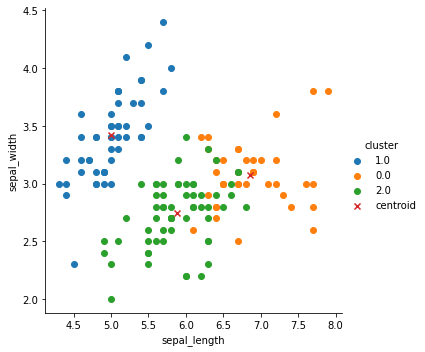

In [277]:
# Run through a simple application
number_of_clusters = 3
kmeans = KMean(n_clusters=number_of_clusters)
kmeans.train(df=df, verbose=False)

# Extract the results
df['cluster'] = kmeans.clusters
centroids = kmeans.centroids
centroids['cluster'] = 'centroid'
print(centroids)
all_df = pd.concat([df, centroids])

# Plot the cluster centroids
sns.FacetGrid(all_df, hue="cluster", height=5, hue_kws={"marker":["o", "o", "o", "x"]}).map(plt.scatter, "sepal_length", "sepal_width").add_legend()

In [278]:
#predicting accuracy and comparing both
wrong=0
for i in df['cluster'].unique():
    cnt=df['cluster'].value_counts()[i]
    if cnt > 50:
        wrong += cnt-50
print("Accuracy from Custom KMeans: ", (150-wrong)/150)
print(df['cluster'].unique())

#calculating labels through Scikit learn K-Means
KM = KMeans(n_clusters = 3, max_iter = 100)
KM.fit(x)
yPred=KM.predict(x)     
yPred=pd.DataFrame(yPred) 

wrong=0
for i in yPred.iloc[:,0].unique():
    cnt=yPred.value_counts()[i]
    if cnt > 50:
        wrong += cnt-50
print("Accuracy from Scikit learn KMeans: ", (150-wrong)/150)
sns.FacetGrid(all_df, hue="cluster", height=5, hue_kws={"marker":["o", "o", "o", "x"]}).map(plt.scatter, "sepal_length", "sepal_width").add_legend()

Accuracy from Custom KMeans:  0.9266666666666666
[1. 0. 2.]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy from Scikit learn KMeans:  0.9466666666666667
